In [3]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

-60.897173823144 25.98183890071263
40.71258796188857 -2.770359074021684
-48.04593864218704 43.71043050821726
-32.30994024681636 170.68313711452356
44.94521494134335 -111.07733884353794
-89.52719916477398 41.92014219042616
77.2322020686347 7.095209117049848
11.93991328096942 100.58794705635341
-67.78610071199927 -47.201075964619235
33.004882357296836 -24.11415634147386
-84.98301651142258 29.228989922070014
10.05640087086195 48.88047636275445
89.63755524535995 86.15410869994713
18.54463827147046 -14.60685590192918
-44.44586127886337 120.04921174358117
-25.064734837783035 87.38005807851113
-87.08665927851246 -20.37342172164449
86.18091568831406 -166.05340290456843
-24.787845609216262 -83.6311692313662
-10.493725878848664 -151.01685160656223
-51.67105398210069 -34.369400469817236
-13.555180933387689 -14.914975817578238
-15.721557790466107 -138.53336204603133
81.60247761124802 -164.18715710390887
37.10444952268432 139.6151581924364
-0.21446801804214033 84.74779187245565
-89.38509695464636 -

-33.26987665678761 -33.162802018912174
62.85799181413091 -110.56033848521353
30.68855410850844 165.49486241809433
-56.74074188355646 -78.95181777253657
-70.83418417173573 150.7961367363955
47.75701865092282 -64.80548261289019
51.60110489442624 116.82213642696149
-24.214719863428883 142.8882648697679
-23.641498859752772 -42.819506574048205
0.02785545848408333 46.098193636916335
77.6196970630325 -25.86952627863863
-66.5560267266037 -118.75066474401122
73.65758138146367 -12.151211315251203
-78.13994831021898 -160.55360287476395
6.545467460465304 -12.950454608112068
12.815945179853003 69.46039150291031
-38.945064440475875 -15.233800250311162
8.655868261202329 5.774953462716752
64.53857677490373 66.53880217545014
69.03570484154298 -85.61512558382466
49.800493205430314 169.4755318004294
-35.56753844532434 -176.64290313770064
41.136798577235254 -74.64105564171713
35.392656382949596 -93.0599142683779
-79.68455321943823 -5.893673044255593
55.600321254769284 -109.37796021429176
-25.2735830490222

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

609

In [9]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key



In [10]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1


# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | guadalajara
Processing Record 3 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | bozeman
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | kui buri
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | bosaso
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | nouakchott
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | marcona
City not found. Skipping...
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | a

Processing Record 38 of Set 4 | castro
Processing Record 39 of Set 4 | baykit
Processing Record 40 of Set 4 | mandera
Processing Record 41 of Set 4 | altay
Processing Record 42 of Set 4 | pampa
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | sydney
Processing Record 45 of Set 4 | aswan
Processing Record 46 of Set 4 | maniitsoq
Processing Record 47 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 48 of Set 4 | asau
Processing Record 49 of Set 4 | atkinson
Processing Record 50 of Set 4 | gillette
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | ambilobe
Processing Record 3 of Set 5 | vilyuysk
Processing Record 4 of Set 5 | meyungs
City not found. Skipping...
Processing Record 5 of Set 5 | new norfolk
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | norman wells
Processing Record 8 of Set 5 | abha
Processing Record 9 of Set 5 | marawi
Processing Record 10 of Set 5 | beringovskiy
Processing Record 11 

Processing Record 25 of Set 8 | lakefield
Processing Record 26 of Set 8 | axim
Processing Record 27 of Set 8 | atar
Processing Record 28 of Set 8 | sumbe
Processing Record 29 of Set 8 | qaanaaq
Processing Record 30 of Set 8 | makokou
Processing Record 31 of Set 8 | sola
Processing Record 32 of Set 8 | bordighera
Processing Record 33 of Set 8 | chokwe
Processing Record 34 of Set 8 | vostok
Processing Record 35 of Set 8 | bantry
Processing Record 36 of Set 8 | nome
Processing Record 37 of Set 8 | cape girardeau
Processing Record 38 of Set 8 | rio grande
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | jawa
Processing Record 41 of Set 8 | eyl
Processing Record 42 of Set 8 | salinas
Processing Record 43 of Set 8 | igarka
Processing Record 44 of Set 8 | estacion coahuila
Processing Record 45 of Set 8 | kodiak
Processing Record 46 of Set 8 | komsomolskiy
Processing Record 47 of Set 8 | poronaysk
Processing Record 48 of Set 8 | kano
Processing Record 49 of Set 8 | okha


Processing Record 16 of Set 12 | malwan
City not found. Skipping...
Processing Record 17 of Set 12 | burns lake
Processing Record 18 of Set 12 | angoche
Processing Record 19 of Set 12 | santa cruz
Processing Record 20 of Set 12 | hammerfest
Processing Record 21 of Set 12 | maimon
City not found. Skipping...
Processing Record 22 of Set 12 | pangnirtung
Processing Record 23 of Set 12 | teknaf
Processing Record 24 of Set 12 | puerto narino
Processing Record 25 of Set 12 | kemin
Processing Record 26 of Set 12 | chegdomyn
Processing Record 27 of Set 12 | boden
Processing Record 28 of Set 12 | swan hill
Processing Record 29 of Set 12 | rastolita
Processing Record 30 of Set 12 | kargasok
Processing Record 31 of Set 12 | sechura
Processing Record 32 of Set 12 | sibolga
Processing Record 33 of Set 12 | energetik
Processing Record 34 of Set 12 | saint-francois
Processing Record 35 of Set 12 | hamilton
Processing Record 36 of Set 12 | tokat
Processing Record 37 of Set 12 | san cristobal
Processin

In [13]:
print(len(city_data))

559


In [14]:

# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,60.42,74,72,17.87,ZA,2022-05-10 22:17:12
1,Guadalajara,20.6667,-103.3333,96.98,14,40,6.91,MX,2022-05-10 22:14:36
2,Ahipara,-35.1667,173.1667,61.18,60,0,11.99,NZ,2022-05-10 22:17:13
3,Bozeman,45.6796,-111.0386,53.02,39,20,10.36,US,2022-05-10 22:14:00
4,Port Alfred,-33.5906,26.8910,67.82,47,99,10.45,ZA,2022-05-10 22:17:14
5,Kui Buri,12.0828,99.8543,79.99,89,96,4.21,TH,2022-05-10 22:17:14
6,Ushuaia,-54.8000,-68.3000,40.66,75,0,6.91,AR,2022-05-10 22:12:16
7,Vila Franca Do Campo,37.7167,-25.4333,66.20,85,96,3.58,PT,2022-05-10 22:12:31
8,Bosaso,11.2842,49.1816,82.42,54,28,4.90,SO,2022-05-10 22:17:15
9,Dikson,73.5069,80.5464,25.16,93,100,26.73,RU,2022-05-10 22:17:15


In [15]:
new_column_order =['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2022-05-10 22:17:12,-34.0033,24.7314,60.42,74,72,17.87
1,Guadalajara,MX,2022-05-10 22:14:36,20.6667,-103.3333,96.98,14,40,6.91
2,Ahipara,NZ,2022-05-10 22:17:13,-35.1667,173.1667,61.18,60,0,11.99
3,Bozeman,US,2022-05-10 22:14:00,45.6796,-111.0386,53.02,39,20,10.36
4,Port Alfred,ZA,2022-05-10 22:17:14,-33.5906,26.8910,67.82,47,99,10.45
5,Kui Buri,TH,2022-05-10 22:17:14,12.0828,99.8543,79.99,89,96,4.21
6,Ushuaia,AR,2022-05-10 22:12:16,-54.8000,-68.3000,40.66,75,0,6.91
7,Vila Franca Do Campo,PT,2022-05-10 22:12:31,37.7167,-25.4333,66.20,85,96,3.58
8,Bosaso,SO,2022-05-10 22:17:15,11.2842,49.1816,82.42,54,28,4.90
9,Dikson,RU,2022-05-10 22:17:15,73.5069,80.5464,25.16,93,100,26.73


In [16]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

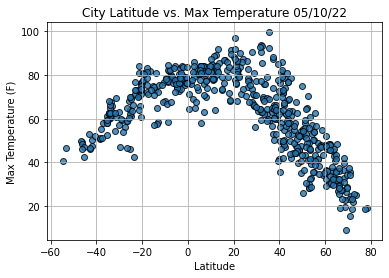

In [18]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

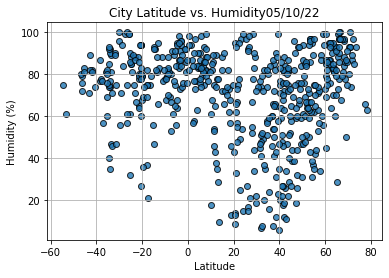

In [21]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()


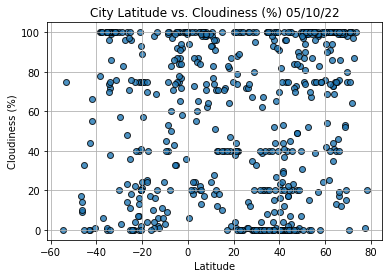

In [22]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

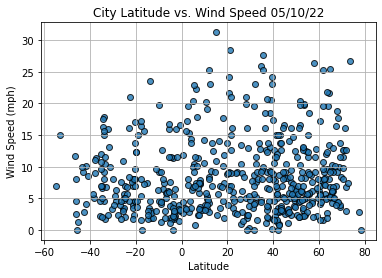

In [23]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [24]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

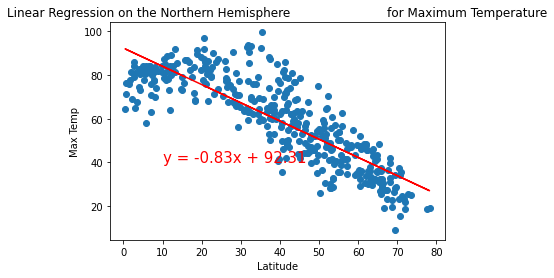

In [26]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

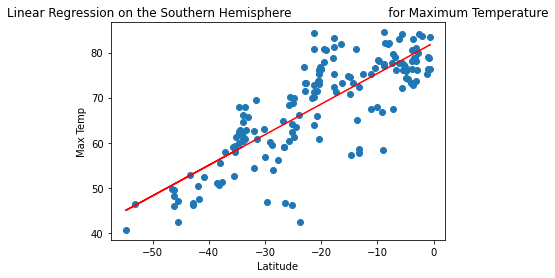

In [27]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

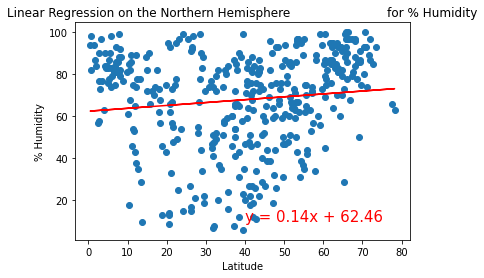

In [28]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

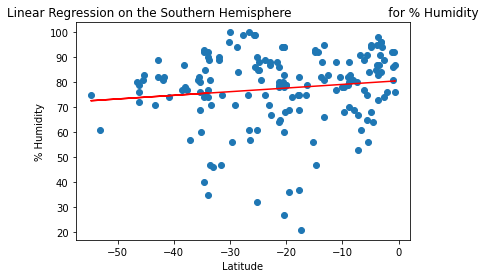

In [29]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

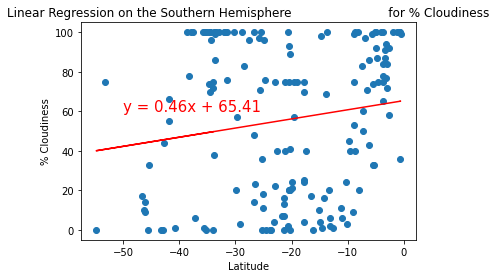

In [30]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

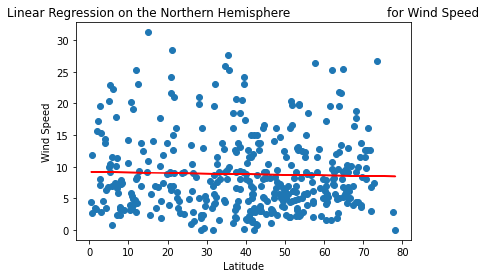

In [31]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))